In [212]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [213]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [214]:
#for mathematical stats of columns 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing step

In [216]:
#find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [217]:
#fill missing values for the numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df.LoanAmount.mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [218]:
#fill the missing values for categorical terms or object datatype -mode(most frequently occuring option)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [219]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis (EDA)

####   Categorical Data Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

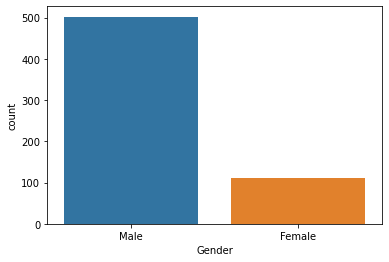

In [220]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

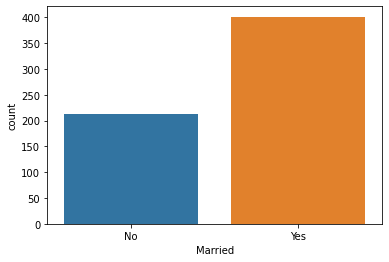

In [221]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

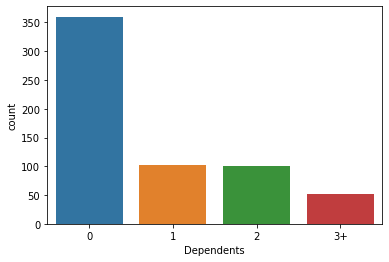

In [222]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

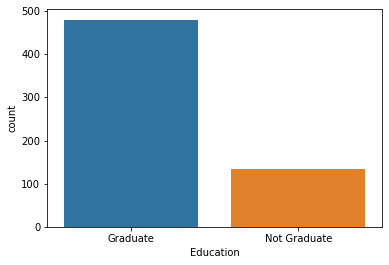

In [223]:
sns.countplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

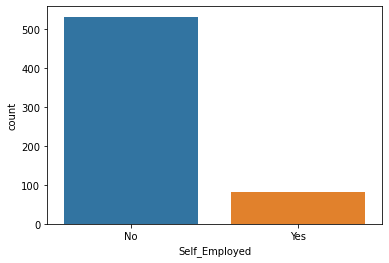

In [224]:
sns.countplot(df['Self_Employed'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

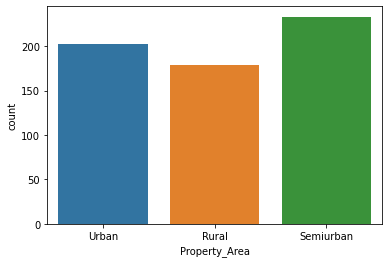

In [225]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

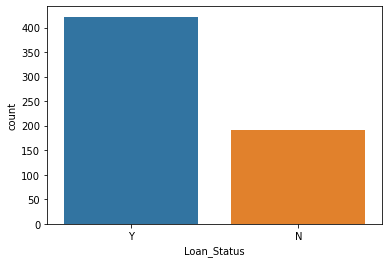

In [226]:
sns.countplot(df['Loan_Status'])

#### Numerical Data Visualization

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

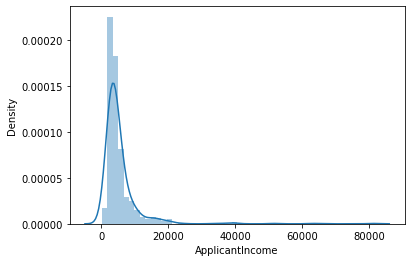

In [227]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

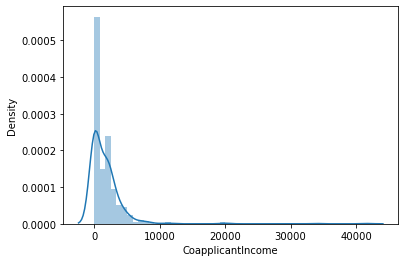

In [228]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

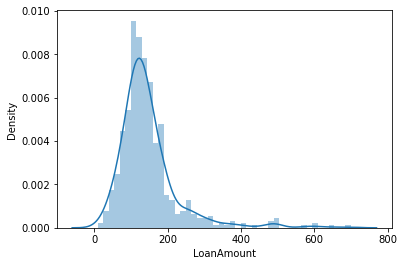

In [229]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

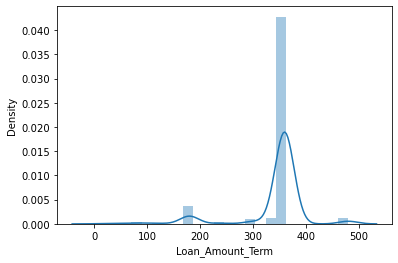

In [230]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

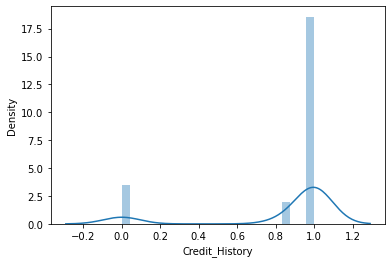

In [231]:
sns.distplot(df['Credit_History'])
#no need to apply normalisation cause its already is in smaller range 

## Creation of New Attributes

In [232]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


## Log Transformation

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

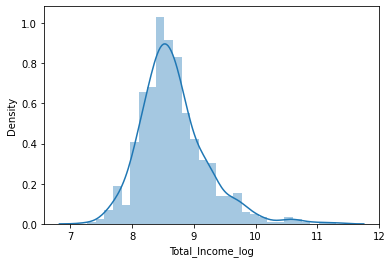

In [233]:
df['Total_Income_log'] = np.log(df['Total_Income']+1)
sns.distplot(df['Total_Income_log'])

<AxesSubplot:xlabel='ApplicantIncome_log', ylabel='Density'>

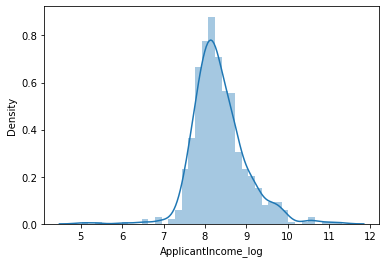

In [234]:
#apply log transformation for the left skewed columns
#Since the above plot shows the income to be in the 0-20000 mostly and very less
#towards the right therefore we should apply log to the column to make it more
#bell curve

df['ApplicantIncome_log'] = np.log(df['ApplicantIncome']+1)
sns.distplot(df['ApplicantIncome_log'])

<AxesSubplot:xlabel='CoapplicantIncome_log', ylabel='Density'>

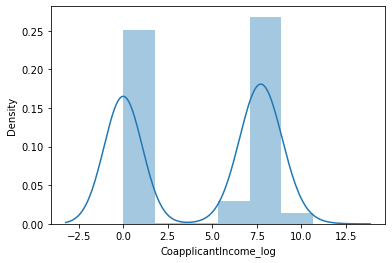

In [235]:
#again left skewed above graph so apply log
df['CoapplicantIncome_log'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncome_log'])

<AxesSubplot:xlabel='LoanAmount_log', ylabel='Density'>

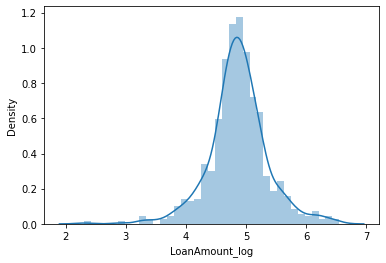

In [236]:
#loan amount is somewhat left skewed so apply log
df['LoanAmount_log'] = np.log(df['LoanAmount']+1)
sns.distplot(df['LoanAmount_log'])

<AxesSubplot:xlabel='Loan_Amount_Term_log', ylabel='Density'>

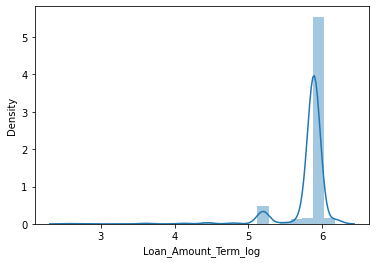

In [237]:
#apply log transformation, Normalizing so that its between smaller values
df['Loan_Amount_Term_log'] = np.log(df['Loan_Amount_Term']+1)
sns.distplot(df['Loan_Amount_Term_log'])

## Correlational Matrix

<AxesSubplot:>

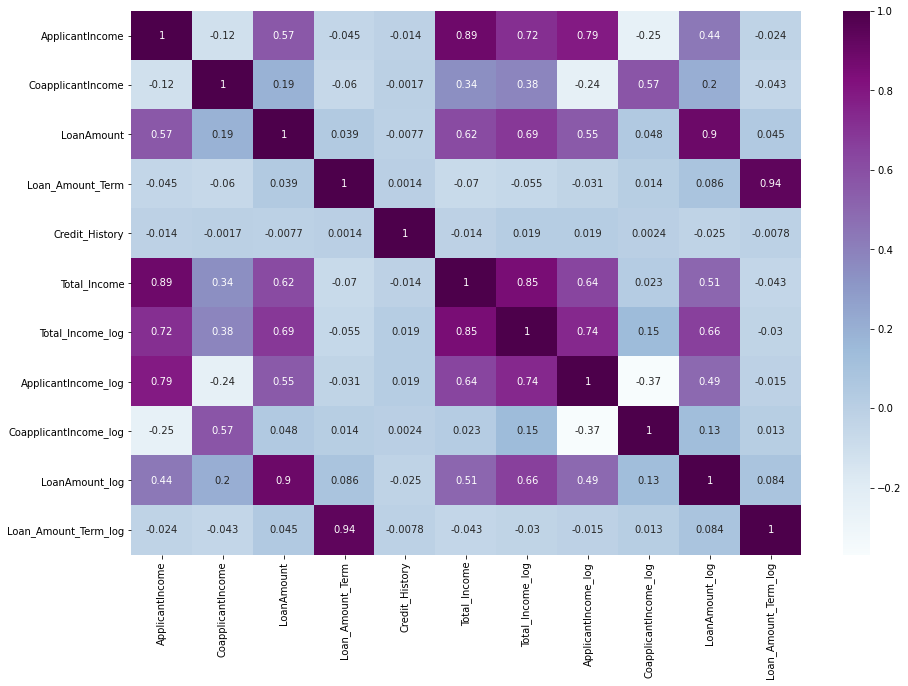

In [240]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot = True,cmap="BuPu")

In [243]:
# drop highly correlated columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,8.674197,0.000000,4.993232,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714732,8.430327,7.319202,4.859812,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,8.006701,0.000000,4.204693,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505525,7.857094,7.765993,4.795791,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,8.699681,0.000000,4.955827,5.888878


## Label Encoding as Categorical values has some meaning

In [247]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [248]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,Loan_Amount_Term_log
0,1,0,0,0,0,1.0,2,1,8.674197,8.674197,0.000000,4.993232,5.888878
1,1,1,1,0,0,1.0,0,0,8.714732,8.430327,7.319202,4.859812,5.888878
2,1,1,0,0,1,1.0,2,1,8.006701,8.006701,0.000000,4.204693,5.888878
3,1,1,0,1,0,1.0,2,1,8.505525,7.857094,7.765993,4.795791,5.888878
4,1,0,0,0,0,1.0,2,1,8.699681,8.699681,0.000000,4.955827,5.888878


In [249]:
# specify input and output attributes
X = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## Model Training

In [ ]:
#classify function

def classify(model,X,y)